# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Part 3: Exploratory Data Analysis

### 1. Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
from scipy import stats
from datetime import datetime
import time
%matplotlib inline

### 2. Read in your data set 

In [3]:
#Load target race results for last couple of years:
#In this instance, get it from the Surfcoast Century Website: http://rapidascent.com.au/SurfcoastCentury/Results/ex/32/2017
#Export data t .csv and save in ../Data/Results/

df_scc2014 = pd.read_csv('../Data/Results/2014 Results.csv')
print ("scc2014 Shape: {}".format(df_scc2014.shape))

df_scc2015 = pd.read_csv('../Data/Results/2015 Results.csv')
print ("scc2015 Shape: {}".format(df_scc2015.shape))

df_scc2016 = pd.read_csv('../Data/Results/2016 Results.csv')
print ("scc2016 Shape: {}".format(df_scc2016.shape))

df_scc2017 = pd.read_csv('../Data/Results/2017 Results.csv')
print ("scc2017 Shape: {}".format(df_scc2017.shape))

df_course = pd.read_csv('../Data/Course/scc_course_table.csv')
print ("df_course Shape: {}".format(df_course.shape))

df_course

scc2014 Shape: (316, 31)
scc2015 Shape: (316, 70)
scc2016 Shape: (341, 73)
scc2017 Shape: (402, 64)
df_course Shape: (9, 8)


,segment,e_gain,e_loss,dist,p_comp,beach,trail,road
0,s1,68,53,10.29,0.1029,0.689018,0.310982,0
1,s2,29,40,10.03,0.1003,0.899302,0.100698,0
2,s3,189,83,10.56,0.1056,0.000000,1.000000,0
3,s4,177,283,18.48,0.1848,0.000000,1.000000,0
4,s5,421,394,20.46,0.2046,0.000000,1.000000,0
5,s6,195,185,7.66,0.0766,0.000000,1.000000,0
6,s7,140,169,8.39,0.0839,0.000000,1.000000,0
7,s8,157,156,14.13,0.1413,0.283086,0.716914,0
8,fin,1327,1324,100.00,1.0000,0.201100,0.798900,0


### 3. Combine data sources into one dataset.

#### Create a df list of individual results and a results dictionary to map fields.

In [34]:
results_dict = {'': 'event_year', 'Name': 'ath_name', 'Time': 'time_fin', 'Category': 'ath_cat', 'Gender': 'gender', 
                'PtAddis': 'time_s1', '10km-Pt Addis': 'time_s1', 'Leg1.1': 'time_s2', '21km-Torquay': 'time_s2',
                'Leg1depart': 'time_cp2', '32km-Ironbark Basin': 'time_s3', '32kmIronbark': 'time_s3', 
                '49km-Anglesea': 'time_s4', '49kmLeg2': 'time_s4', '49kmDeparture' :'time_cp4',
                '70km-Distillery Creek' :'time_s5', '70kmDistillery' :'time_s5', '77km-Moggs Creek': 'time_s6', 
                '77kmLeg3': 'time_s6', '77kmDeparture': 'time_cp6', '86km-Aireys Inlet': 'time_s7', '86kmAireys': 'time_s7',          
                '100km-Anglesea': 'time_s8', 'Finish': 'time_s8', 'Pace':'pace_fin','Pace1':'pace_s1','Pace2':'pace_s2',
                'Pace3':'pace_s3','Pace4':'pace_s4','Pace5':'pace_s5','Pace6':'pace_s6','Pace7':'pace_s7','Pace8':'pace_s8'}

old_cols = results_dict.keys()
new_cols = results_dict.values()

#### Create a blank dataframe to store aggregated surfcoast century results.

In [35]:
used = set()
unique_headers = [x for x in new_cols if x not in used and (used.add(x) or True)]
df_results = pd.DataFrame(columns = unique_headers) 
df_results.columns

Index(['event_year', 'ath_name', 'time_fin', 'ath_cat', 'gender', 'time_s1',
       'time_s2', 'time_cp2', 'time_s3', 'time_s4', 'time_cp4', 'time_s5',
       'time_s6', 'time_cp6', 'time_s7', 'time_s8', 'pace_fin', 'pace_s1',
       'pace_s2', 'pace_s3', 'pace_s4', 'pace_s5', 'pace_s6', 'pace_s7',
       'pace_s8'],
      dtype='object')

#### Add 2014-2017 SCC results data to the dataframe

In [36]:
df = df_scc2014
start = 2014
rename_cols = list(df.columns.intersection(old_cols))
drop_cols = df.columns.difference(old_cols)
df = df.drop(drop_cols, axis=1)
df = df.rename(columns=lambda x: results_dict[x] if x in results_dict else x)
df.insert(0, 'event_year', start)
print("df_scc{} shape: {}".format(start, df.shape))
df_results = df_results.append(df, ignore_index=True, sort=True)
print ("\n df_scc{} dropped columns: {}".format(start,drop_cols))
print ("\n df_scc{} final columns: {}".format(start,df.columns))

df_scc2014 shape: (316, 9)

 df_scc2014 dropped columns: Index(['C/Pos2', 'C/Pos4', 'C/Pos6', 'C/Pos8', 'Cat Pos', 'Fav', 'G/Pos2',
       'G/Pos4', 'G/Pos6', 'G/Pos8', 'Gen Pos', 'Leg1', 'Leg2', 'Leg3', 'Leg4',
       'O/Pos2', 'O/Pos4', 'O/Pos6', 'O/Pos8', 'Pos', 'Race No', 'Share',
       'TOD'],
      dtype='object')

 df_scc2014 final columns: Index(['event_year', 'ath_name', 'time_fin', 'ath_cat', 'gender', 'time_s2',
       'time_s4', 'time_s6', 'time_s8'],
      dtype='object')


In [37]:
df = df_scc2015
start = 2015
rename_cols = list(df.columns.intersection(old_cols))
drop_cols = df.columns.difference(old_cols)
df = df.drop(drop_cols, axis=1)
df = df.rename(columns=lambda x: results_dict[x] if x in results_dict else x)
df.insert(0, 'event_year', start)
print("df_scc{} shape: {}".format(start, df.shape))
df_results = df_results.append(df, ignore_index=True, sort=True)
print ("\n df_scc{} dropped columns: {}".format(start,drop_cols))
print ("\n df_scc{} final columns: {}".format(start,df.columns))

df_scc2015 shape: (316, 25)

 df_scc2015 dropped columns: Index(['C/Pos1', 'C/Pos2', 'C/Pos3', 'C/Pos4', 'C/Pos5', 'C/Pos6', 'C/Pos7',
       'C/Pos8', 'Cat Pos', 'Fav', 'G/Pos1', 'G/Pos2', 'G/Pos3', 'G/Pos4',
       'G/Pos5', 'G/Pos6', 'G/Pos7', 'G/Pos8', 'Gen Pos', 'Leg1', 'Leg2',
       'Leg3', 'Leg4', 'O/Pos1', 'O/Pos2', 'O/Pos3', 'O/Pos4', 'O/Pos5',
       'O/Pos6', 'O/Pos7', 'O/Pos8', 'Pace.1', 'Pace1.1', 'Pace2.1', 'Pace3.1',
       'Pace4.1', 'Pace5.1', 'Pace6.1', 'Pace7.1', 'Pace8.1', 'Pos', 'Race No',
       'Second Categ', 'Second Categ Pos', 'Share', 'TOD'],
      dtype='object')

 df_scc2015 final columns: Index(['event_year', 'ath_name', 'time_fin', 'ath_cat', 'gender', 'pace_fin',
       'time_s1', 'pace_s1', 'time_s2', 'pace_s2', 'time_cp2', 'time_s3',
       'pace_s3', 'time_s4', 'pace_s4', 'time_cp4', 'time_s5', 'pace_s5',
       'time_s6', 'pace_s6', 'time_cp6', 'time_s7', 'pace_s7', 'time_s8',
       'pace_s8'],
      dtype='object')


In [38]:
df = df_scc2016
start = 2016
rename_cols = list(df.columns.intersection(old_cols))
drop_cols = df.columns.difference(old_cols)
df = df.drop(drop_cols, axis=1)
df = df.rename(columns=lambda x: results_dict[x] if x in results_dict else x)
df.insert(0, 'event_year', start)
print("df_scc{} shape: {}".format(start, df.shape))
df_results = df_results.append(df, ignore_index=True, sort=True)
print ("\n df_scc{} dropped columns: {}".format(start,drop_cols))
print ("\n df_scc{} final columns: {}".format(start,df.columns))

df_scc2016 shape: (341, 25)

 df_scc2016 dropped columns: Index(['C/Pos1', 'C/Pos2', 'C/Pos3', 'C/Pos4', 'C/Pos5', 'C/Pos6', 'C/Pos7',
       'C/Pos8', 'C/Poscp2', 'C/Poscp4', 'C/Poscp6', 'Cat Pos', 'Fav',
       'G/Pos1', 'G/Pos2', 'G/Pos3', 'G/Pos4', 'G/Pos5', 'G/Pos6', 'G/Pos7',
       'G/Pos8', 'G/Poscp2', 'G/Poscp4', 'G/Poscp6', 'Gen Pos', 'O/Pos1',
       'O/Pos2', 'O/Pos3', 'O/Pos4', 'O/Pos5', 'O/Pos6', 'O/Pos7', 'O/Pos8',
       'O/Poscp2', 'O/Poscp4', 'O/Poscp6', 'Pace.1', 'Pace1.1', 'Pace2.1',
       'Pace3.1', 'Pace4.1', 'Pace5.1', 'Pace6.1', 'Pace7.1', 'Pace8.1', 'Pos',
       'Race No', 'Share', 'TOD'],
      dtype='object')

 df_scc2016 final columns: Index(['event_year', 'ath_name', 'time_fin', 'ath_cat', 'gender', 'pace_fin',
       'time_s1', 'pace_s1', 'time_s2', 'pace_s2', 'time_cp2', 'time_s3',
       'pace_s3', 'time_s4', 'pace_s4', 'time_cp4', 'time_s5', 'pace_s5',
       'time_s6', 'pace_s6', 'time_cp6', 'time_s7', 'pace_s7', 'time_s8',
       'pace_s8'],
      d

In [39]:
df = df_scc2017
start = 2017
rename_cols = list(df.columns.intersection(old_cols))
drop_cols = df.columns.difference(old_cols)
df = df.drop(drop_cols, axis=1)
df = df.rename(columns=lambda x: results_dict[x] if x in results_dict else x)
df.insert(0, 'event_year', start)
print("df_scc{} shape: {}".format(start, df.shape))
df_results = df_results.append(df, ignore_index=True, sort=True)
print ("\n df_scc{} dropped columns: {}".format(start,drop_cols))
print ("\n df_scc{} final columns: {}".format(start,df.columns))

df_scc2017 shape: (402, 22)

 df_scc2017 dropped columns: Index(['C/Pos1', 'C/Pos2', 'C/Pos3', 'C/Pos4', 'C/Pos5', 'C/Pos6', 'C/Pos7',
       'C/Pos8', 'Cat Pos', 'Dist', 'Fav', 'G/Pos1', 'G/Pos2', 'G/Pos3',
       'G/Pos4', 'G/Pos5', 'G/Pos6', 'G/Pos7', 'G/Pos8', 'Gen Pos', 'O/Pos1',
       'O/Pos2', 'O/Pos3', 'O/Pos4', 'O/Pos5', 'O/Pos6', 'O/Pos7', 'O/Pos8',
       'Pace.1', 'Pace1.1', 'Pace2.1', 'Pace3.1', 'Pace4.1', 'Pace5.1',
       'Pace6.1', 'Pace7.1', 'Pace8.1', 'Pos', 'Race No', 'Second Categ',
       'Second Categ Pos', 'Share', 'TOD'],
      dtype='object')

 df_scc2017 final columns: Index(['event_year', 'ath_name', 'time_fin', 'ath_cat', 'gender', 'pace_fin',
       'time_s1', 'pace_s1', 'time_s2', 'pace_s2', 'time_s3', 'pace_s3',
       'time_s4', 'pace_s4', 'time_s5', 'pace_s5', 'time_s6', 'pace_s6',
       'time_s7', 'pace_s7', 'time_s8', 'pace_s8'],
      dtype='object')


#### Prepare to add course attributes to the dataframe

In [40]:
df_course.head()

,segment,e_gain,e_loss,dist,p_comp,beach,trail,road
0,s1,68,53,10.29,0.1029,0.689018,0.310982,0
1,s2,29,40,10.03,0.1003,0.899302,0.100698,0
2,s3,189,83,10.56,0.1056,0.000000,1.000000,0
3,s4,177,283,18.48,0.1848,0.000000,1.000000,0
4,s5,421,394,20.46,0.2046,0.000000,1.000000,0


#### Remove road as it has not values attached.

In [41]:
df_course.drop('road', axis = 1, inplace=True)

#### Create variables for each course attribute per segment and add to the main dataframe.

In [42]:
seg_list = df_course['segment'].unique()
var_list = df_course.columns.drop('segment').unique()

for s in seg_list:
    for v in var_list:
        cols = v + '_' + s
        df_results[cols] = df_course[df_course.segment == s][v].max()

### 4. View the dataframe

In [43]:
print ("df_results shape: {}".format(df_results.shape))
df_results.head(3)

df_results shape: (1375, 79)


,ath_cat,ath_name,event_year,gender,pace_fin,pace_s1,pace_s2,pace_s3,pace_s4,pace_s5,...,dist_s8,p_comp_s8,beach_s8,trail_s8,e_gain_fin,e_loss_fin,dist_fin,p_comp_fin,beach_fin,trail_fin
0,Team Of 3 or 4,Team LOVE THE RUN BOYS,2014,Male,NaN,NaN,NaN,NaN,NaN,NaN,...,14.13,0.1413,0.283086,0.716914,1327,1324,100.0,1.0,0.2011,0.7989
1,Team Of 3 or 4,Team THE POES,2014,Male,NaN,NaN,NaN,NaN,NaN,NaN,...,14.13,0.1413,0.283086,0.716914,1327,1324,100.0,1.0,0.2011,0.7989
2,Team Of 3 or 4,Team THE PEPTIDES,2014,Unisex,NaN,NaN,NaN,NaN,NaN,NaN,...,14.13,0.1413,0.283086,0.716914,1327,1324,100.0,1.0,0.2011,0.7989


In [44]:
df_results.tail(3)

,ath_cat,ath_name,event_year,gender,pace_fin,pace_s1,pace_s2,pace_s3,pace_s4,pace_s5,...,dist_s8,p_comp_s8,beach_s8,trail_s8,e_gain_fin,e_loss_fin,dist_fin,p_comp_fin,beach_fin,trail_fin
1372,40-49,Ying TIAN,2017,Female,11.88,9.47,8.87,9,9.05,13.73,...,14.13,0.1413,0.283086,0.716914,1327,1324,100.0,1.0,0.2011,0.7989
1373,40-49,Jason WONG,2017,Male,12.03,8.43,8.5,8.8,10.58,14.98,...,14.13,0.1413,0.283086,0.716914,1327,1324,100.0,1.0,0.2011,0.7989
1374,40-49,Loong Chow Darren LEE,2017,Male,12.03,8.43,8.5,8.8,10.57,15,...,14.13,0.1413,0.283086,0.716914,1327,1324,100.0,1.0,0.2011,0.7989


### 5. Perform Data Clense

##### Remove teams as this analysis is based on individuals running the whole 100km.

In [45]:
print("Athlete Categories pre_clean: {}".format(df_results['ath_cat'].unique()))
cat_to_drop = ('Team Of 3 or 4','Team Of 2','Team of 3 or 4','Team of 2','Team of 3 or 4-Mixed','Team of 2-Mixed')

for x in cat_to_drop:
    df_results = df_results[df_results.ath_cat != x]

print("Athlete Categories post_clean: {}".format(df_results['ath_cat'].unique()))

Athlete Categories pre_clean: ['Team Of 3 or 4' 'Team Of 2' '20-39' '40-49' '50-59' 'Under 20'
 'Team of 3 or 4' 'Team of 2' 'Team of 3 or 4-Mixed' 'Team of 2-Mixed'
 '60+']
Athlete Categories post_clean: ['20-39' '40-49' '50-59' 'Under 20' '60+']


#### Remove DNF's (did not finish) as they will skew early segment performance data but didn't finish

In [46]:
print("Number of DNF's removed: {}".format(df_results[df_results.time_fin=='DNF']['time_fin'].count()))
df_results = df_results[df_results.time_fin != 'DNF']

Number of DNF's removed: 32


#### Check the number of null values across each field in the dataframe.

In [47]:
df_results.isnull().sum()

ath_cat         0
ath_name        0
event_year      0
gender          0
pace_fin      182
pace_s1       182
pace_s2       182
pace_s3       182
pace_s4       182
pace_s5       182
pace_s6       182
pace_s7       182
pace_s8       182
time_cp2      424
time_cp4      424
time_cp6      424
time_fin        0
time_s1       182
time_s2         0
time_s3       182
time_s4         0
time_s5       182
time_s6         0
time_s7       182
time_s8         0
e_gain_s1       0
e_loss_s1       0
dist_s1         0
p_comp_s1       0
beach_s1        0
             ... 
e_gain_s5       0
e_loss_s5       0
dist_s5         0
p_comp_s5       0
beach_s5        0
trail_s5        0
e_gain_s6       0
e_loss_s6       0
dist_s6         0
p_comp_s6       0
beach_s6        0
trail_s6        0
e_gain_s7       0
e_loss_s7       0
dist_s7         0
p_comp_s7       0
beach_s7        0
trail_s7        0
e_gain_s8       0
e_loss_s8       0
dist_s8         0
p_comp_s8       0
beach_s8        0
trail_s8        0
e_gain_fin

#### Define a strategy to deal with the missing data.

2014 is removed below, checkpoint info will be removed after time variable are converted to appropriate types.

| Type of Field | No. Years Missing | Decision |
|---|---|
|Checkpoint time | 2 | Remove data from main analysis, stratify for checkpoint analysis|
|Segment 1,3,5,7 stats | 1 | Remove 2014 completely|


In [48]:
print ("Previous sample size with 2014 included: {}".format(len(df_results)))
       
df_results = df_results[df_results.event_year>2014]
       
print ("New sample size with 2014 removed: {}".format(len(df_results)))

Previous sample size with 2014 included: 797
New sample size with 2014 removed: 615


#### Confirm correctness of the datatypes for course variables that were added into the dataframe .

In [49]:
df_results.loc[:,'e_gain_s1':'trail_fin'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 320 to 1374
Data columns (total 54 columns):
e_gain_s1     615 non-null int64
e_loss_s1     615 non-null int64
dist_s1       615 non-null float64
p_comp_s1     615 non-null float64
beach_s1      615 non-null float64
trail_s1      615 non-null float64
e_gain_s2     615 non-null int64
e_loss_s2     615 non-null int64
dist_s2       615 non-null float64
p_comp_s2     615 non-null float64
beach_s2      615 non-null float64
trail_s2      615 non-null float64
e_gain_s3     615 non-null int64
e_loss_s3     615 non-null int64
dist_s3       615 non-null float64
p_comp_s3     615 non-null float64
beach_s3      615 non-null float64
trail_s3      615 non-null float64
e_gain_s4     615 non-null int64
e_loss_s4     615 non-null int64
dist_s4       615 non-null float64
p_comp_s4     615 non-null float64
beach_s4      615 non-null float64
trail_s4      615 non-null float64
e_gain_s5     615 non-null int64
e_loss_s5     615 non-null int64
di

#### Check time variables for correctness of data type.

In [50]:
time_var = ['time_fin','time_s1','time_s2','time_s3','time_s4','time_s5', 'time_s6','time_s7','time_s8',
            'time_cp2', 'time_cp4', 'time_cp6']
df_results[time_var].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 320 to 1374
Data columns (total 12 columns):
time_fin    615 non-null object
time_s1     615 non-null object
time_s2     615 non-null object
time_s3     615 non-null object
time_s4     615 non-null object
time_s5     615 non-null object
time_s6     615 non-null object
time_s7     615 non-null object
time_s8     615 non-null object
time_cp2    373 non-null object
time_cp4    373 non-null object
time_cp6    373 non-null object
dtypes: object(12)
memory usage: 62.5+ KB


#### Correct the data types for all of the time fields.

In [51]:
for t in time_var:
    df_results[t] = pd.to_datetime(df_results[t], format= '%H:%M:%S')

df_results[time_var].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 320 to 1374
Data columns (total 12 columns):
time_fin    615 non-null datetime64[ns]
time_s1     615 non-null datetime64[ns]
time_s2     615 non-null datetime64[ns]
time_s3     615 non-null datetime64[ns]
time_s4     615 non-null datetime64[ns]
time_s5     615 non-null datetime64[ns]
time_s6     615 non-null datetime64[ns]
time_s7     615 non-null datetime64[ns]
time_s8     615 non-null datetime64[ns]
time_cp2    373 non-null datetime64[ns]
time_cp4    373 non-null datetime64[ns]
time_cp6    373 non-null datetime64[ns]
dtypes: datetime64[ns](12)
memory usage: 62.5 KB


#### Check and fix all the float data variables for pace.

In [52]:
pace_var = ['pace_fin', 'pace_s1', 'pace_s2', 'pace_s3', 'pace_s4', 'pace_s5',
            'pace_s6', 'pace_s7', 'pace_s8']
df_results[pace_var].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 320 to 1374
Data columns (total 9 columns):
pace_fin    615 non-null object
pace_s1     615 non-null object
pace_s2     615 non-null object
pace_s3     615 non-null object
pace_s4     615 non-null object
pace_s5     615 non-null object
pace_s6     615 non-null object
pace_s7     615 non-null object
pace_s8     615 non-null object
dtypes: object(9)
memory usage: 48.0+ KB


In [53]:
for p in pace_var:
    df_results[p] = pd.to_numeric(df_results[p])
    
df_results[pace_var].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 320 to 1374
Data columns (total 9 columns):
pace_fin    615 non-null float64
pace_s1     615 non-null float64
pace_s2     615 non-null float64
pace_s3     615 non-null float64
pace_s4     615 non-null float64
pace_s5     615 non-null float64
pace_s6     615 non-null float64
pace_s7     615 non-null float64
pace_s8     615 non-null float64
dtypes: float64(9)
memory usage: 48.0 KB


#### Create a dataframe for the bulk of the analysis and define lists of like variables for easier analysis later.

This includes finalising the missing data strategy by removing the checkpoint data which will be used for secondary analysis.


In [54]:
info = ['ath_cat', 'gender', 'time_fin','pace_fin','e_gain_fin','e_loss_fin','dist_fin','beach_fin','trail_fin','p_comp_fin']
cont = ['ath_cat', 'gender', 'time_fin','pace_fin','pace_s1', 'pace_s2', 'pace_s3', 'pace_s4', 'pace_s5', 'pace_s6', 'pace_s7', 'pace_s8']
paces = ['pace_s1', 'pace_s2', 'pace_s3', 'pace_s4', 'pace_s5', 'pace_s6', 'pace_s7', 'pace_s8','pace_fin']
cps = ['time_cp2','time_cp4','time_cp6']
e_gains = ['e_gain_s1', 'e_gain_s2', 'e_gain_s3', 'e_gain_s4', 'e_gain_s5', 'e_gain_s6', 'e_gain_s7', 'e_gain_s8', 'e_gain_fin' ]
e_losses = ['e_loss_s1', 'e_loss_s2', 'e_loss_s3', 'e_loss_s4', 'e_loss_s5', 'e_loss_s6', 'e_loss_s7', 'e_loss_s8', 'e_loss_fin']
distances = ['dist_s1','dist_s2', 'dist_s3', 'dist_s4', 'dist_s5', 'dist_s6', 'dist_s7', 'dist_s8', 'dist_fin']
p_progress = ['p_comp_s1','p_comp_s2','p_comp_s3','p_comp_s4','p_comp_s5','p_comp_s6','p_comp_s7','p_comp_s8','p_comp_fin'] 
p_beach = ['beach_s1','beach_s2', 'beach_s3', 'beach_s4', 'beach_s5', 'beach_s6', 'beach_s7', 'beach_s8', 'beach_fin']
p_trail = ['trail_s1', 'trail_s2', 'trail_s3', 'trail_s4', 'trail_s5', 'trail_s6', 'trail_s7', 'trail_s8', 'trail_fin']   

df = df_results.drop(columns = cps)
df = df.drop(columns = 'ath_name')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 320 to 1374
Data columns (total 75 columns):
ath_cat       615 non-null object
event_year    615 non-null object
gender        615 non-null object
pace_fin      615 non-null float64
pace_s1       615 non-null float64
pace_s2       615 non-null float64
pace_s3       615 non-null float64
pace_s4       615 non-null float64
pace_s5       615 non-null float64
pace_s6       615 non-null float64
pace_s7       615 non-null float64
pace_s8       615 non-null float64
time_fin      615 non-null datetime64[ns]
time_s1       615 non-null datetime64[ns]
time_s2       615 non-null datetime64[ns]
time_s3       615 non-null datetime64[ns]
time_s4       615 non-null datetime64[ns]
time_s5       615 non-null datetime64[ns]
time_s6       615 non-null datetime64[ns]
time_s7       615 non-null datetime64[ns]
time_s8       615 non-null datetime64[ns]
e_gain_s1     615 non-null int64
e_loss_s1     615 non-null int64
dist_s1       615 non-null floa

#### Dataframe quality commentary

The dataframe above now has all the key variables, with 'Pace' being the dependant variable and the remainder being the independent variables.  There a no null values across the 615 sample size and all variables now have the correct data type.

## 6. Conduct Exploratory Analysis

The summary table below highlights that the mean pace slows down between segments 1 through to 8 with the standard deviation increasing by 80% between segment 1 and 8.  Although not a surprising result, there are several variations that need to be understood:

1) Segment 2 is faster than segment 1 when it is typical for runners to start too harder.

2) Slower performance by segment could be a product of normal fatigue or racing too fast earlier on.

3) The mean speed for segments 6 and 7 are actually slower that the last segment.  This could potentially be due to hilly segments.

4) In terms of variation of fitness and performance, finishing times ranged from between 8:17 and 20:03.  Standardisation will need to be done and assess whether it better removes the fitness factor as the objective of this project is to proedict an optimum pace given the course conditions and and my fitness level.

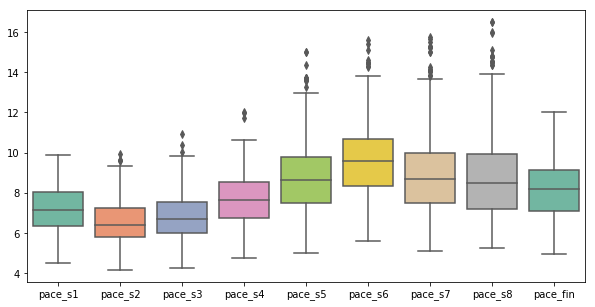

In [55]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[paces], orient='v',palette="Set2");

In [56]:
print(df['time_fin'].describe())
df[cont].describe()

count                     615
unique                    569
top       1900-01-01 13:47:08
freq                        4
first     1900-01-01 08:17:08
last      1900-01-01 20:03:55
Name: time_fin, dtype: object


,pace_fin,pace_s1,pace_s2,pace_s3,pace_s4,pace_s5,pace_s6,pace_s7,pace_s8
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,8.209447,7.202423,6.540911,6.807008,7.678780,8.746894,9.646813,8.908374,8.804049
std,1.412694,1.167559,1.063435,1.153333,1.274047,1.656640,1.720975,1.883853,2.063331
min,4.970000,4.530000,4.180000,4.280000,4.730000,5.000000,5.600000,5.080000,5.270000
25%,7.090000,6.360000,5.800000,5.990000,6.740000,7.500000,8.360000,7.475000,7.200000
50%,8.180000,7.130000,6.380000,6.680000,7.630000,8.620000,9.580000,8.670000,8.480000
75%,9.140000,8.020000,7.250000,7.550000,8.510000,9.785000,10.675000,9.960000,9.910000
max,12.030000,9.880000,9.930000,10.920000,12.030000,15.000000,15.600000,15.750000,16.470000


#### Producing a pairplot for continuous variables (pace) to view correlation and distribution.

Again, it is not surprising that there is a correlation in pace between segments as this is primarily due to the fitness of the runner (a fitter runner will run at a faster pace for the whole race).  

However, looking at the distributions, there is a completely normal distribution of runners in segment 1 which really starts to grow a tail by segment 8 (of runners running much slower that the average...i.e. walking).

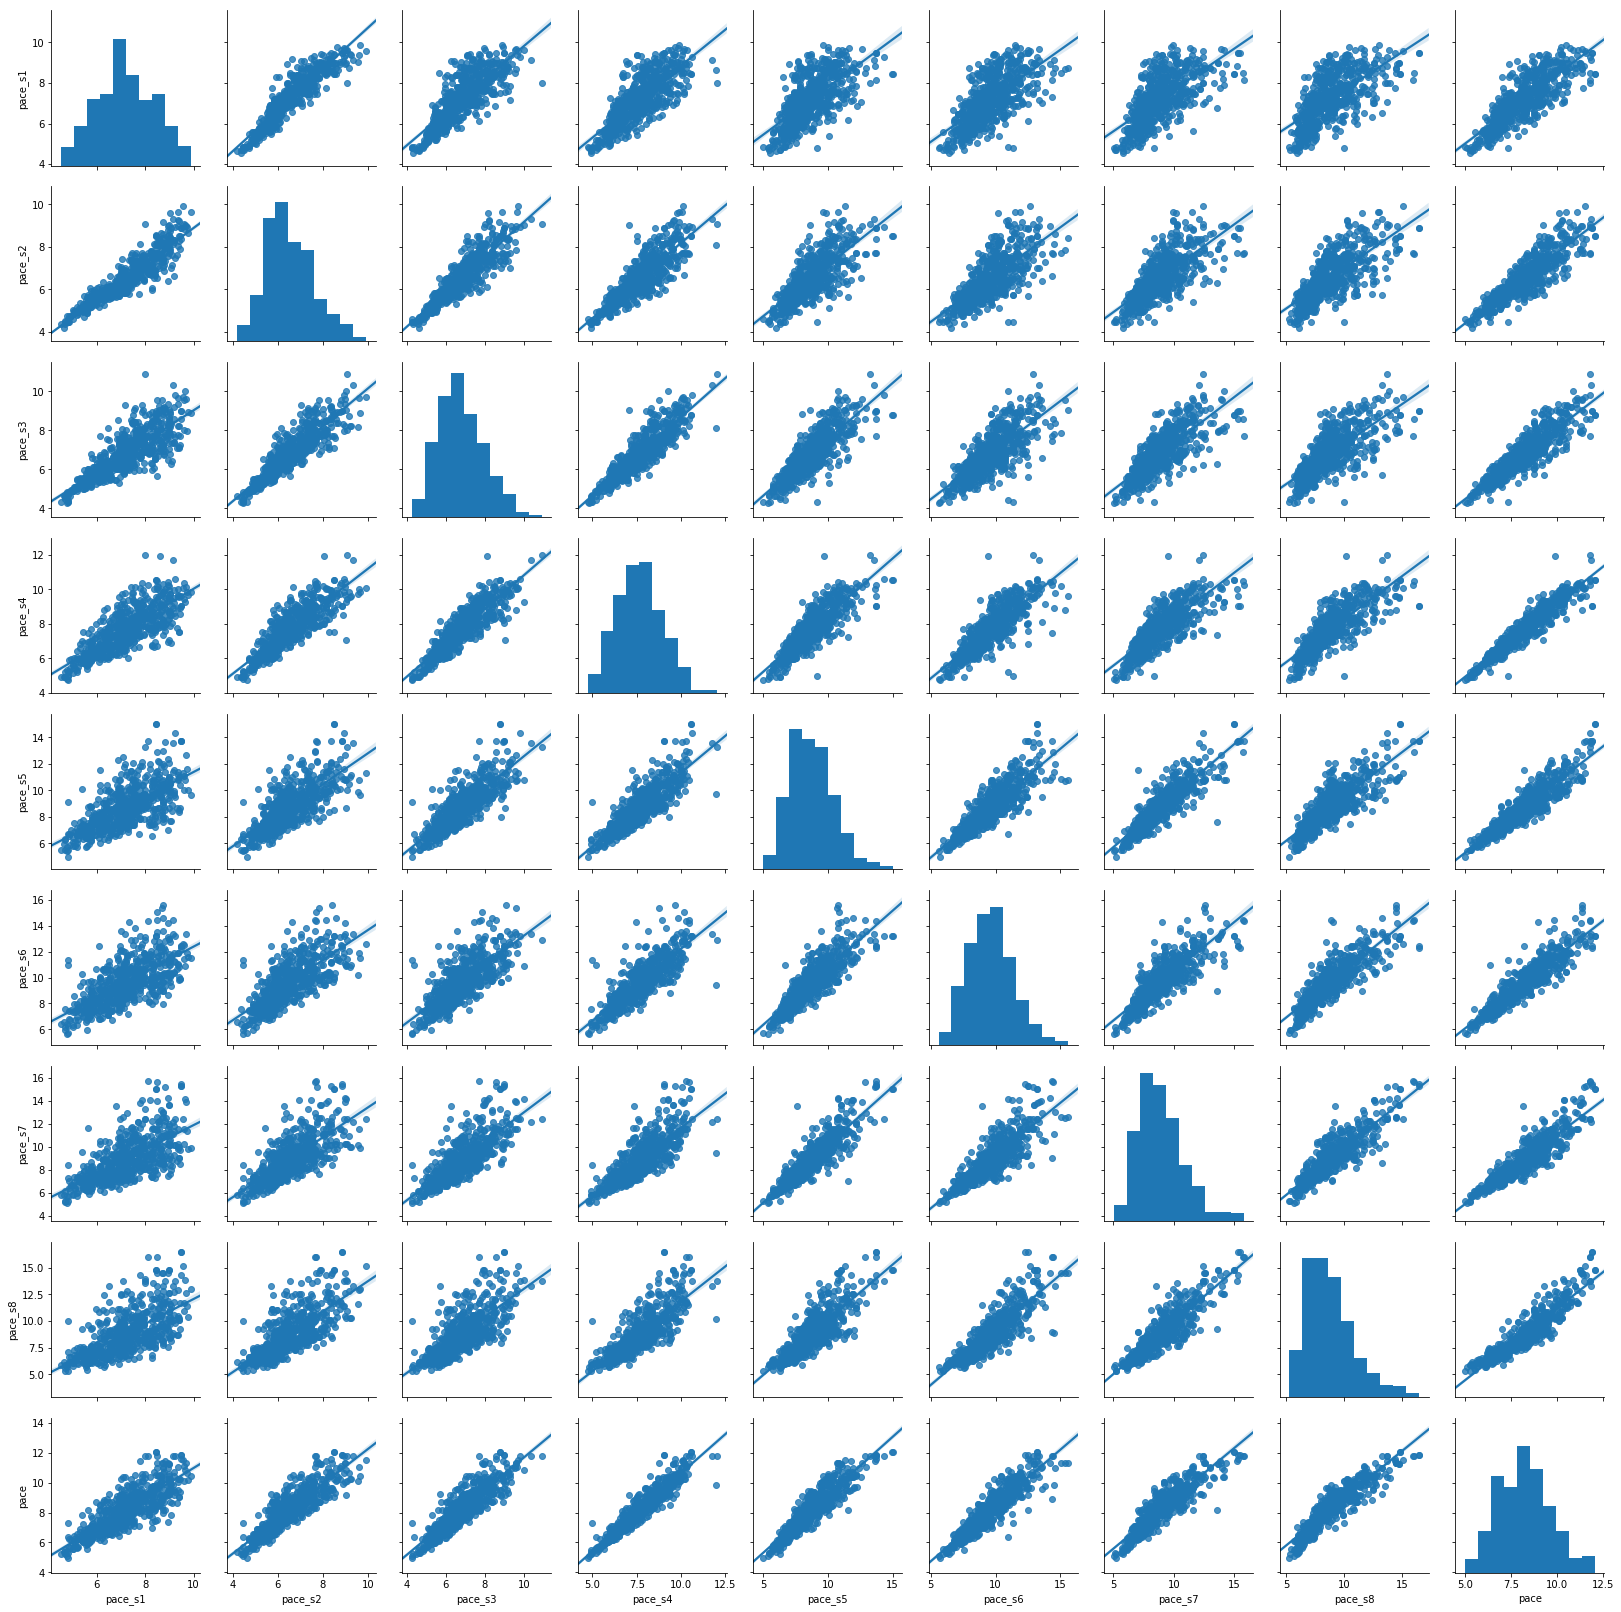

In [26]:
sns.pairplot(df[paces], kind = 'reg');

#### Standardising pace.

By standardising pace per segment, the variaton of pace appears to be very similar across the segments.  There is an increase in outliers from segments 5-8 which would indicate anomalies during the race such as nutriton problems or injury.

Otherwise, it appears that regardless of fitness, most athletes are impacted equally by impacts such as elevation, terrain surface and fatigue.

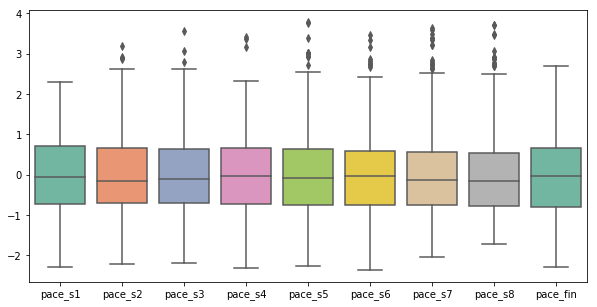

In [57]:
df_pace = df[paces]
z_df=(df_pace-df_pace.mean())/df_pace.std()
z_df = z_df.join(df[['ath_cat', 'gender']])
plt.figure(figsize=(10,5))
sns.boxplot(data=z_df, orient='v', palette="Set2");

In [58]:
# path = r'C:\Users\Travis\Desktop\GA_Homework\ds_pt_homework\final-projects\Data\'
#r'../Data/'
df.to_csv('scc_data.csv')

## 7. Analysis Plan

#### Hypothesis 

**H0: Null Hypothesis**|**Ha: Alternate Hypthesis**
---|---
That there is no relationship between the overall pace and the terrain and race duration within each segment.| That the hillier the terrain, the softer the sand, and the further progressed into the race that you are, the slower that you will go. 


**1) Confirm gender/category assumptions:** It is assumed that age group or gender have little impact on normalised pacing performance across the segments.  To test his assumption, normalised data will be produced by age group and agenda to test for anything surprising.


**2) Calculate Regression:**  Predict pacing strategies using regression on the elevation, progress and surface vairables.


**3) Test Null Hypothesis:** Check that the null hypothesis that there is no relationship between the terrain, duration and pace is rejected.  Threshold @ p >=0.05.


**4) Calculate Confidence Limits:** To communicate with 95% condifence, the range of time that an athlete would arrive complete each segment of the race.   